In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df_train = pd.read_csv('../input/chaii-hindi-and-tamil-question-answering/train.csv')
df_test = pd.read_csv('../input/chaii-hindi-and-tamil-question-answering/test.csv')
df_train.head()

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil


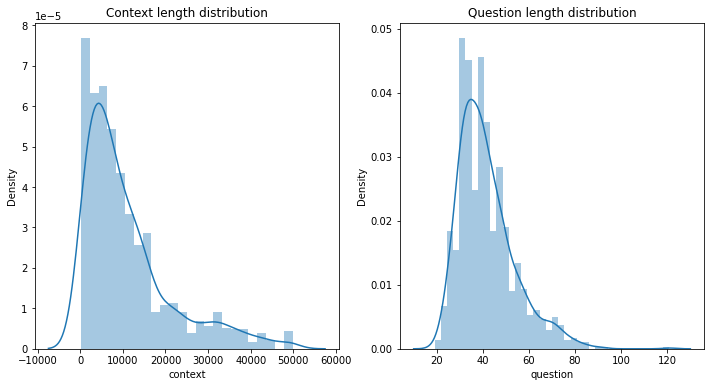

In [3]:
context_length = df_train['context'].apply(len)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(context_length)
plt.title('Context length distribution')
plt.subplot(1, 2, 2)
sns.distplot(df_train['question'].apply(len))
plt.title('Question length distribution')
plt.show()

In [4]:
# tokenize the context and question
context_tokens = df_train['context'].apply(lambda x: x.split())
question_tokens = df_train['question'].apply(lambda x: x.split())

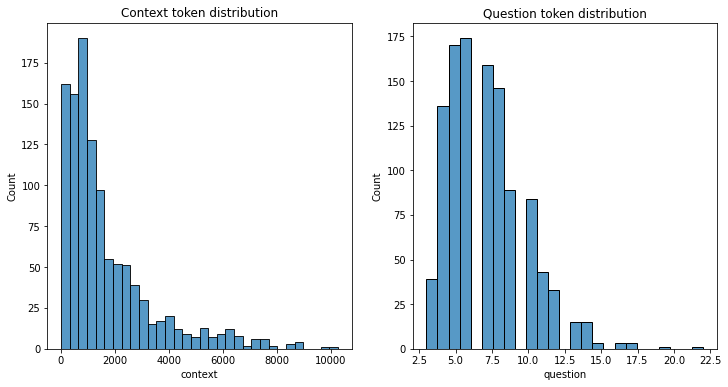

In [5]:
# plot token distribution of context and question
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(context_tokens.apply(len))
plt.title('Context token distribution')
plt.subplot(1, 2, 2)
sns.histplot(question_tokens.apply(len))
plt.title('Question token distribution')
plt.show()

<AxesSubplot:>

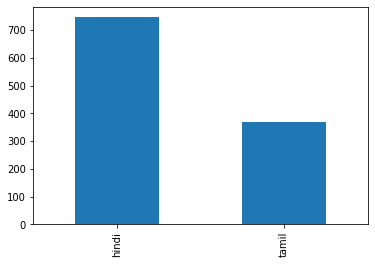

In [6]:
df_train.language.value_counts().plot(kind='bar')

In [7]:
from datasets import Dataset, DatasetDict

ds = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "test": Dataset.from_pandas(df_test)
})
clean_ds = ds['train'].train_test_split(test_size=0.1, seed=42)
ds['validation'] = clean_ds['test']
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'context', 'question', 'answer_text', 'answer_start', 'language'],
        num_rows: 1114
    })
    test: Dataset({
        features: ['id', 'context', 'question', 'language'],
        num_rows: 5
    })
    validation: Dataset({
        features: ['id', 'context', 'question', 'answer_text', 'answer_start', 'language'],
        num_rows: 112
    })
})

In [117]:
def show_samples(dataset, num_samples=1, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['context']}'")
        print(f"'>> Review: {example['question']}'")


show_samples(ds)


'>> Title: என்புருக்கி நோய் அல்லது காச நோய் (Tuberculosis, டியூபர்க்குலோசிசு) என்பது மைக்கோபாக்டீரியா (mycobacteria) என்னும் நுண் கோலுயிரியின் தாக்குதலால் மாந்தர்களுக்கு ஏற்படும் கடும் தொற்றுநோய். இதனால் நோயுற்றவர் இறக்கவும் நேரிடும். இந்நோய் முக்கியமாக மைக்கோபாக்டீரியம் டியூபர்க்குலோசிசு (Mycobacterium tuberculosis) என்னும் நுண்ணுயிரியால் ஏற்படுகின்றது.
மைக்கோபாக்டீரியம் போவிசு (Mycobacterium bovis),
மைக்கோபாக்டீரியம் ஆப்பிரிக்கானம் (Mycobacterium africanum),
மைக்கோபாக்டீரியம் கனெட்டி (Mycobacterium canetti),
மைக்கோபாக்டீரியம் மைக்குரோட்டி (Mycobacterium microti) முதலான நுண்ணுயிரிகளாலும் தூண்டப்படலாம்[1].
நோயின் தாக்கம் காச நோயானது பொதுவாக மூச்சுத்தொகுதியில் நுரையீரலைத் தாக்கி நோயுண்டாக்கினாலும், இவை நரம்புத் தொகுதி, நிணநீர்த் தொகுதி (Lymphatic system), இரைப்பை-குடல் தொகுதி, எலும்புகள் மூட்டுகள், குருதிச் சுழற்சிப்பாதை, சிறுநீரகம், பாலுறுப்புகள், தோல் போன்ற பற்பல பகுதிகளிலும் நோயுண்டாக்க வல்லவை.
இந்நோய் பொதுவாக டி.பி (TB) எனக் குறிப்பிடப்படுகிறது. TB என்பது T</b>ubercle b</b>acillus 

In [9]:
# checking that answer_text has only one answer
ds['train'].filter(lambda x: len(list(x['answer_text'])) > 1)

  0%|          | 0/2 [00:00<?, ?ba/s]

Dataset({
    features: ['id', 'context', 'question', 'answer_text', 'answer_start', 'language'],
    num_rows: 1108
})

In [10]:
from transformers import AutoTokenizer

model_checkpoint = "deepset/xlm-roberta-base-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [11]:
df_train[df_train.language=='hindi'].answer_text[368]

'एडोल्फ मेयर'

In [12]:
context = ds["train"][368]["context"]
question = ds["train"][368]["question"]

inputs = tokenizer(question, context)
tokenizer.decode(inputs["input_ids"])

Token indices sequence length is longer than the specified maximum sequence length for this model (706 > 512). Running this sequence through the model will result in indexing errors


'<s> सन १८८६ में किसने बताया कि तम्बाकू में मोजेक रोग एक विशेष प्रकार के वाइरस के द्वारा होता है?</s></s> विषाणु अकोशिकीय अतिसूक्ष्म जीव हैं जो केवल जीवित कोशिका में ही वंश वृद्धि कर सकते हैं।[1] ये नाभिकीय अम्ल और प्रोटीन से मिलकर गठित होते हैं, शरीर के बाहर तो ये मृत-समान होते हैं परंतु शरीर के अंदर जीवित हो जाते हैं। इन्हे क्रिस्टल के रूप में इकट्ठा किया जा सकता है। एक विषाणु बिना किसी सजीव माध्यम के पुनरुत्पादन नहीं कर सकता है। यह सैकड़ों वर्षों तक सुशुप्तावस्था में रह सकता है और जब भी एक जीवित मध्यम या धारक के संपर्क में आता है उस जीव की कोशिका को भेद कर आच्छादित कर देता है और जीव बीमार हो जाता है। एक बार जब विषाणु जीवित कोशिका में प्रवेश कर जाता है, वह कोशिका के मूल आरएनए एवं डीएनए की जेनेटिक संरचना को अपनी जेनेटिक सूचना से बदल देता है और संक्रमित कोशिका अपने जैसे संक्रमित कोशिकाओं का पुनरुत्पादन शुरू कर देती है। विषाणु का अंग्रेजी शब्द वाइरस का शाब्दिक अर्थ विष होता है। सर्वप्रथम सन १७९६ में डाक्टर एडवर्ड जेनर ने पता लगाया कि चेचक, विषाणु के कारण होता है। उन्होंने चेचक के टीके क

In [13]:
inputs = tokenizer(
    question,
    context,
    return_offsets_mapping=True,
    return_overflowing_tokens=True,
    truncation='only_second',
    max_length=100,
    stride=50
)
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [14]:
ds['train'][0].keys()

dict_keys(['id', 'context', 'question', 'answer_text', 'answer_start', 'language'])

In [15]:
start_position, end_position = [], []
for i, offset in enumerate(inputs['offset_mapping']):
    sample_indexes = inputs['overflow_to_sample_mapping'][i]
    answer_text = ds['train'][368]['answer_text']
    answer_start = ds['train'][368]['answer_start']
    answer_end = answer_start+len(answer_text)
    sequence_ids = inputs.sequence_ids(i)
    
    idx = 0
    while sequence_ids[idx] != 1:
        idx += 1
    context_start = idx
    while sequence_ids[idx] == 1:
        idx += 1
    context_end = idx - 1
    if offset[context_start][0]>answer_start or offset[context_end][1]<answer_end:
        start_position.append(0)
        end_position.append(0)
    else:
        idx = context_start
        while idx <= context_end and offset[idx][0]<=answer_start:
            idx += 1
        start_position.append(idx - 1)
        idx = context_end
        while idx >= context_start and offset[idx][1]>=answer_end:
            idx -= 1
        end_position.append(idx + 1)
print(start_position, end_position)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 74, 56, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95, 77, 59, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
idx = 13
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = ds['train']["answer_text"][368]

start = start_position[idx]
end = end_position[idx]
labeled_answer = tokenizer.decode(inputs["input_ids"][idx][start : end + 1])

print(f"Theoretical answer: {answer}, labels give: {labeled_answer}")

Theoretical answer: एडोल्फ मेयर, labels give: एडोल्फ मेयर


In [17]:
max_length = 385
stride = 128

def preprocessing_samples(examples):
    questions = [ques.strip() for ques in examples['question']]
    inputs = tokenizer(
        questions,
        examples['context'],
        max_length = max_length,
        stride = stride,
        return_offsets_mapping = True,
        return_overflowing_tokens = True,
        truncation='only_second'
    )
    answer_texts = examples['answer_text']
    answer_starts = examples['answer_start']
    offset_mapping = inputs['offset_mapping']
    overflow_tokens = inputs['overflow_to_sample_mapping']
    start_positions, end_positions = [], []
    print(len(offset_mapping))
    for i, offset in enumerate(offset_mapping):
        sample_index = overflow_tokens[i]
        answer_start = answer_starts[sample_index]
        answer_end = answer_starts[sample_index]+len(answer_texts[sample_index])
#         print(answer_start,answer_end)
        sequence_ids = inputs.sequence_ids(i)
        
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1
        if offset[context_start][0]>answer_start or offset[context_end][1]<answer_end:
            start_positions.append(0)
            end_positions.append(0)
        else:
            idx = context_start
            while idx <= context_end and offset[idx][0]<=answer_start:
                idx += 1
            start_positions.append(idx - 1)
            idx = context_end
            while idx >= context_start and offset[idx][1]>=answer_end:
                idx -= 1
            end_positions.append(idx + 1)
    inputs['start_positions'] = start_positions
    inputs['end_positions'] = end_positions
    return inputs

In [18]:
len(preprocessing_samples(ds['train'][0:3])['start_positions']),len(preprocessing_samples(ds['train'][0:3])['end_positions'])

21
21


(21, 21)

In [19]:
ds['train'].column_names

['id', 'context', 'question', 'answer_text', 'answer_start', 'language']

In [20]:
train_dataset = ds["train"].map(
    preprocessing_samples,
    batched=True,
    remove_columns=ds["train"].column_names,
)
len(ds["train"]), len(train_dataset)

  0%|          | 0/2 [00:00<?, ?ba/s]

13170
1514


(1114, 14684)

In [21]:
def preprocess_validation_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["id"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

In [22]:
validation_dataset = ds["validation"].map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=ds["validation"].column_names,
)
len(ds["validation"]), len(validation_dataset)

  0%|          | 0/1 [00:00<?, ?ba/s]

(112, 1559)

In [94]:
test_dataset = ds["test"].map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=ds["test"].column_names,
)
len(ds["test"]), len(test_dataset)

  0%|          | 0/1 [00:00<?, ?ba/s]

(5, 67)

In [23]:
from datasets import load_metric

metric = load_metric('squad')

In [24]:
n_best = 20
max_answer_length = 50

In [99]:
from tqdm.auto import tqdm
from collections import defaultdict
import numpy as np

def compute_metrics(start_logits, end_logits, features, examples, mode='train'):
    example_to_features = defaultdict(list)
    for idx, feature in enumerate(features):
        example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for example in tqdm(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []

        # Loop through all features associated with that example
        for feature_index in example_to_features[example_id]:
            start_logit = start_logits[feature_index]
            end_logit = end_logits[feature_index]
            offsets = features[feature_index]["offset_mapping"]

            start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
            end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Skip answers that are not fully in the context
                    if offsets[start_index] is None or offsets[end_index] is None:
                        continue
                    # Skip answers with a length that is either < 0 or > max_answer_length
                    if (
                        end_index < start_index
                        or end_index - start_index + 1 > max_answer_length
                    ):
                        continue

                    answer = {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                    answers.append(answer)

        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})
    if mode=='train':
        theoretical_answers = [{"id": ex["id"], "answers": ex["answer_text"]} for ex in examples]
    else:
        theoretical_answers=None
    return predicted_answers,theoretical_answers

In [26]:
from transformers import AutoModelForQuestionAnswering
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

In [27]:
from huggingface_hub import notebook_login

notebook_login()

In [33]:
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad-chaii",
    evaluation_strategy="no",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    push_to_hub=True,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [119]:
ds['train'][368]

{'id': '416091aeb',
 'context': 'विषाणु अकोशिकीय अतिसूक्ष्म जीव हैं जो केवल जीवित कोशिका में ही वंश वृद्धि कर सकते हैं।[1] ये नाभिकीय अम्ल और प्रोटीन से मिलकर गठित होते हैं, शरीर के बाहर तो ये मृत-समान होते हैं परंतु शरीर के अंदर जीवित हो जाते हैं। इन्हे क्रिस्टल के रूप में इकट्ठा किया जा सकता है। एक विषाणु बिना किसी सजीव माध्यम के पुनरुत्पादन नहीं कर सकता है। यह सैकड़ों वर्षों तक सुशुप्तावस्था में रह सकता है और जब भी एक जीवित मध्यम या धारक के संपर्क में आता है उस जीव की कोशिका को भेद कर आच्छादित कर देता है और जीव बीमार हो जाता है। एक बार जब विषाणु जीवित कोशिका में प्रवेश कर जाता है, वह कोशिका के मूल आरएनए एवं डीएनए की जेनेटिक संरचना को अपनी जेनेटिक सूचना से बदल देता है और संक्रमित कोशिका अपने जैसे संक्रमित कोशिकाओं का पुनरुत्पादन शुरू कर देती है।\nविषाणु का अंग्रेजी शब्द वाइरस का शाब्दिक अर्थ विष होता है। सर्वप्रथम सन १७९६ में डाक्टर एडवर्ड जेनर ने पता लगाया कि चेचक, विषाणु के कारण होता है। उन्होंने चेचक के टीके का आविष्कार भी किया। इसके बाद सन १८८६ में एडोल्फ मेयर ने बताया कि तम्बाकू

In [31]:
!sudo apt update
!sudo apt install git-lfs

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5389 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6751 B]       
Get:3 https://packages.cloud.google.com/apt google-fast-socket InRelease [5405 B]0m
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:5 http://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [1443 B]33m
Get:6 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [316 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease                    
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 https://

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)
trainer.train()

In [111]:
predictions, _, _ = trainer.predict(validation_dataset)
start_logits, end_logits = predictions
pr, re=compute_metrics(start_logits, end_logits, validation_dataset, ds["validation"])

The following columns in the test set don't have a corresponding argument in `XLMRobertaForQuestionAnswering.forward` and have been ignored: offset_mapping, example_id. If offset_mapping, example_id are not expected by `XLMRobertaForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1559
  Batch size = 8


  0%|          | 0/112 [00:00<?, ?it/s]

In [77]:
pr[:2]

[{'id': 'b3b1e04f3', 'prediction_text': ' 1905-1921'},
 {'id': '71a1c9770', 'prediction_text': ' 30,368,609'}]

In [112]:
pr_l, re_l = [], []
import string

def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
#     def remove_articles(text):
#         print(text)
#         return re.sub(r"\b(a|an|the)\b", " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_punc(lower(s)))
for i in pr:
    pr_l.append(normalize_answer(i['prediction_text']))
for i in re:
    re_l.append(normalize_answer(i['answers']))

In [113]:
metric=load_metric('exact_match')
metric.compute(predictions=pr_l, references=re_l)

{'exact_match': 82.14285714285714}

In [116]:
df_result = pd.DataFrame({
    "Predicted Answer":pr_l,
    "Refernced Answer":re_l
})
df_result.sample(30)

,Predicted Answer,Refernced Answer
30,सिर,सिर
63,அகுவாபா,அகுவாபா
84,இத்தாலியிலுள்ள வின்சி,இத்தாலியிலுள்ள வின்சி
74,१४ सितम्बर,१४ सितम्बर
60,गाय,गाय
91,001 से 10 नैनोमीटर,001 से 10 नैनोमीटर
45,2009 ஆம் ஆண்டு மார்ச் 23,2009 ஆம் ஆண்டு மார்ச் 23
21,एडोल्फ मेयर,एडोल्फ मेयर
9,१२ जनवरी २०१७,१२ जनवरी २०१७
99,दुबई,दुबई


In [ ]:
trainer.push_to_hub(commit_message="Training complete")

In [92]:
df_test.head()

,id,context,question,language
0,22bff3dec,"ज्वाला गुट्टा (जन्म: 7 सितंबर 1983; वर्धा, महा...",ज्वाला गुट्टा की माँ का नाम क्या है,hindi
1,282758170,गूगल मानचित्र (Google Maps) (पूर्व में गूगल लो...,गूगल मैप्स कब लॉन्च किया गया था?,hindi
2,d60987e0e,गुस्ताव रॉबर्ट किरचॉफ़ (१२ मार्च १८२४ - १७ अक्...,गुस्ताव किरचॉफ का जन्म कब हुआ था?,hindi
3,f99c770dc,அலுமினியம் (ஆங்கிலம்: அலுமினியம்; வட அமெரிக்க ...,அலுமினியத்தின் அணு எண் என்ன?,tamil
4,40dec1964,"கூட்டுறவு இயக்க வரலாறு, இங்கிலாந்து நாட்டில் ...",இந்தியாவில் பசுமை புரட்சியின் தந்தை என்று கருத...,tamil


### Results on the test dataset

In [101]:
predictions, _, _ = trainer.predict(test_dataset)
start_logits, end_logits = predictions
pr, re=compute_metrics(start_logits, end_logits, test_dataset, ds["test"], 'test')
pr, re

The following columns in the test set don't have a corresponding argument in `XLMRobertaForQuestionAnswering.forward` and have been ignored: offset_mapping, example_id. If offset_mapping, example_id are not expected by `XLMRobertaForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 67
  Batch size = 8


  0%|          | 0/5 [00:00<?, ?it/s]

([{'id': '22bff3dec', 'prediction_text': ' येलन'},
  {'id': '282758170', 'prediction_text': ' 9 फ़रवरी 2007'},
  {'id': 'd60987e0e', 'prediction_text': '१२ मार्च १८२४'},
  {'id': 'f99c770dc', 'prediction_text': ' 13'},
  {'id': '40dec1964',
   'prediction_text': 'சுவாமிநாதன் மற்றும் வர்கீஸ் குரியன்'}],
 None)

In [106]:
pr_l_test=[]
for i in pr:
    pr_l_test.append(i['prediction_text'].strip())

In [107]:
df_sub = pd.DataFrame({
    "id":df_test.id,
    "PredictionString":pr_l_test
})
df_sub.head()

,id,PredictionString
0,22bff3dec,येलन
1,282758170,9 फ़रवरी 2007
2,d60987e0e,१२ मार्च १८२४
3,f99c770dc,13
4,40dec1964,சுவாமிநாதன் மற்றும் வர்கீஸ் குரியன்


In [109]:
df_sub.to_csv('submission.csv', index=False)